In [2]:
import os
import json
import openai
from openai import OpenAI
import pandas as pd
import re
import csv
import numpy as np

f1_json_path = '../deploy_llm_evaluation/evaluation_results/f1_results.json'

with open(f1_json_path, 'r') as f:
        data_records = json.load(f)

df_f1 = pd.DataFrame(data_records)

# ------------------------------------------------------------------
# Add all your synonyms-based columns here:
# ------------------------------------------------------------------
metrics = [
    'precision', 'recall', 'f1_score',
    'synonyms_precision_dict', 'synonyms_recall_dict', 'synonyms_f1_dict',
    'synonyms_precision_snomed', 'synonyms_recall_snomed', 'synonyms_f1_snomed',
    'synonyms_precision_wn', 'synonyms_recall_wn', 'synonyms_f1_wn',
    'synonyms_lemmatized_precision_dict', 'synonyms_lemmatized_recall_dict', 'synonyms_lemmatized_f1_dict',
    'synonyms_lemmatized_precision_snomed', 'synonyms_lemmatized_recall_snomed', 'synonyms_lemmatized_f1_snomed',
    'synonyms_lemmatized_precision_wn', 'synonyms_lemmatized_recall_wn', 'synonyms_lemmatized_f1_wn'
]

df = pd.read_csv('../deploy_llm_evaluation/evaluation_results/raw_GPT4-score.csv')
df = df[df['subfolder'] != 'Meditron_api']

df_f1.rename(columns={'model_subfolder': 'subfolder'}, inplace=True)

# Ensure consistent dtypes for merging
df['model'] = df['model'].astype(str)
df_f1['model'] = df_f1['model'].astype(str)

df['subfolder'] = df['subfolder'].astype(str)
df_f1['subfolder'] = df_f1['subfolder'].astype(str)

df['category_id'] = df['category_id'].astype(str)
df_f1['category_id'] = df_f1['category_id'].astype(str)

df['question_index'] = df['question_index'].astype(str)
df_f1['question_index'] = df_f1['question_index'].astype(str)

# Merge
df_merged = pd.merge(
    df, df_f1,
    on=['model','subfolder', 'category_id', 'question_index', 'iteration_number'],
    how='left'
)

rename_dict = {
    'Llama': 'Llama 3.3-70B-Instruct',
    'Meditron': 'Meditron 3-70B',
    'Llama-8B': 'Llama 3.1-8B-Instruct',
    'Claude': 'Claude 3.5 Sonnet',
    'Med42': 'Med42-70B',
    'NVLM': 'NVLM-70B', 
    'Llama-1B': 'Llama 3.2-1B-Instruct',
    'Gemini_2.5Pro': 'Gemini 2.5 Pro',
    'Gemma-3-27B' : 'Gemma 3 27B', 
    'MedGemma-3-27B' : 'MedGemma 27B',
    'rephrased_true_answers': 'Rephrased Gold Answers'
}

df_merged['model'] = df_merged['model'].replace(rename_dict)

df_merged = df_merged.drop(columns=['file_name', 'subfolder', 'nlp_model', 'GPT_overall_score_wo_Q4&5'])

df_merged = df_merged.rename(columns={
    'GPT1': 'MedGPT1',
    'GPT2': 'MedGPT2',
    'GPT3': 'MedGPT3',
    'GPT4': 'MedGPT4',
    'GPT5': 'MedGPT5',
    'GPT_overall_score' : 'MedGPT_overall_score'	
})


df_merged = df_merged[df_merged['category_id'] != '6']
df_f1.to_csv('f1_raw.csv')
df_merged.to_csv('all_questions_answers_scores.csv')
df_merged

,model,category_id,iteration_number,question_index,question,model_answer,gold_answer,MedGPT1,MedGPT2,MedGPT3,...,synonyms_f1_wn,synonyms_lemmatized_precision_dict,synonyms_lemmatized_recall_dict,synonyms_lemmatized_f1_dict,synonyms_lemmatized_precision_snomed,synonyms_lemmatized_recall_snomed,synonyms_lemmatized_f1_snomed,synonyms_lemmatized_precision_wn,synonyms_lemmatized_recall_wn,synonyms_lemmatized_f1_wn
0,Llama 3.3-70B-Instruct,1,1,0,How is HIV diagnosed?,HIV diagnosis typically involves a combination...,HIV is diagnosed through HIV testing. There ar...,3.0,3.0,3.0,...,0.157303,0.122449,0.176471,0.144578,0.122449,0.176471,0.144578,0.122449,0.176471,0.144578
1,Llama 3.3-70B-Instruct,1,1,1,What are the different stages of HIV?,The different stages of HIV are:\n\n1. **Acute...,The different stages of HIV are either defined...,4.0,3.0,4.0,...,0.208333,0.135135,0.500000,0.212766,0.162162,0.600000,0.255319,0.135135,0.500000,0.212766
2,Llama 3.3-70B-Instruct,1,1,2,How is HIV transmitted?,HIV (Human Immunodeficiency Virus) is primaril...,HIV is spread from the body fluids of an infec...,4.0,4.0,5.0,...,0.243902,0.200000,0.545455,0.292683,0.133333,0.363636,0.195122,0.166667,0.454545,0.243902
3,Llama 3.3-70B-Instruct,1,1,3,What comorbidities are common among people liv...,People living with HIV often experience variou...,The most common comorbidities amongst patients...,3.0,3.0,3.0,...,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593
4,Llama 3.3-70B-Instruct,1,1,4,How can HIV be prevented?,HIV prevention methods include:\n\n1. **Using ...,HIV prevention involves several key strategies...,4.0,4.0,4.0,...,0.356164,0.468750,0.375000,0.416667,0.437500,0.350000,0.388889,0.437500,0.350000,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,MedGemma 27B,5,5,19,A 32-year-old man with a past medical history ...,"Okay, let's break down this case.\n\nThe descr...",The etiology of these lesions is HPV (types 6 ...,5.0,5.0,5.0,...,0.066667,0.038462,0.250000,0.066667,0.038462,0.250000,0.066667,0.038462,0.250000,0.066667
4544,MedGemma 27B,5,5,20,"A 24-year-old man, who recently migrated from ...",The user wants to know the most appropriate in...,Continue antitubercular therapy and antiretrov...,4.0,4.0,5.0,...,0.029630,0.007812,0.250000,0.015152,0.007812,0.250000,0.015152,0.015625,0.500000,0.030303
4545,MedGemma 27B,5,5,21,A 37-year-old African-American man presents to...,The user wants me to act as a senior HIV physi...,Focal segmental glomerulosclerosis (FSGS) asso...,3.0,3.0,3.0,...,0.086207,0.046729,0.714286,0.087719,0.046729,0.714286,0.087719,0.046729,0.714286,0.087719
4546,MedGemma 27B,5,5,22,A 39-year-old man comes to the emergency depar...,"Okay, let's break down this case.\n\nThe patie...",A Treponemal test is most likely to confirm th...,4.0,4.0,5.0,...,0.027778,0.028986,1.000000,0.056338,0.028986,1.000000,0.056338,0.028986,1.000000,0.056338


In [9]:
#For generating unsupervised version
df = pd.read_csv('../deploy_llm_evaluation/evaluation_results/unsupervised_raw_GPT4-score.csv')
df = df[df['subfolder'] != 'Meditron_api']
df['category_id'] = df['category_id'].astype(str)
df = df[df['category_id'] != '6']
rename_dict = {
    'Llama': 'Llama 3.3-70B-Instruct',
    'Meditron': 'Meditron 3-70B',
    'Llama-8B': 'Llama 3.1-8B-Instruct',
    'Claude': 'Claude 3.5 Sonnet',
    'Med42': 'Med42-70B',
    'NVLM': 'NVLM-70B', 
    'Llama-1B': 'Llama 3.2-1B-Instruct',
    'Gemini_2.5Pro': 'Gemini 2.5 Pro',
    'Gemma-3-27B' : 'Gemma 3 27B', 
    'MedGemma-3-27B' : 'MedGemma 27B',
    'rephrased_true_answers': 'Rephrased Gold Answers'
}

df['model'] = df['model'].replace(rename_dict)
df = df.drop(columns=['file_name', 'subfolder', 'GPT_overall_score_wo_Q4&5'])
df = df.rename(columns={
    'GPT1': 'MedGPT1',
    'GPT2': 'MedGPT2',
    'GPT3': 'MedGPT3',
    'GPT4': 'MedGPT4',
    'GPT5': 'MedGPT5',
    'GPT_overall_score' : 'MedGPT_overall_score'	
})

df.to_csv('all_questions_answers_scores_unsupervised.csv')
df

,model,category_id,iteration_number,question_index,question,model_answer,MedGPT1,MedGPT2,MedGPT3,MedGPT4,MedGPT5,MedGPT_overall_score
0,Llama 3.3-70B-Instruct,1,1,0,How is HIV diagnosed?,HIV diagnosis typically involves a combination...,5.0,5.0,5.0,5.0,5.0,5.0
1,Llama 3.3-70B-Instruct,1,1,1,What are the different stages of HIV?,The different stages of HIV are:\n\n1. **Acute...,5.0,5.0,5.0,5.0,5.0,5.0
2,Llama 3.3-70B-Instruct,1,1,2,How is HIV transmitted?,HIV (Human Immunodeficiency Virus) is primaril...,5.0,5.0,5.0,5.0,5.0,5.0
3,Llama 3.3-70B-Instruct,1,1,3,What comorbidities are common among people liv...,People living with HIV often experience variou...,5.0,4.0,5.0,5.0,5.0,4.8
4,Llama 3.3-70B-Instruct,1,1,4,How can HIV be prevented?,HIV prevention methods include:\n\n1. **Using ...,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4545,MedGemma 27B,5,5,19,A 32-year-old man with a past medical history ...,"Okay, let's break down this case.\n\nThe descr...",5.0,5.0,5.0,5.0,5.0,5.0
4546,MedGemma 27B,5,5,20,"A 24-year-old man, who recently migrated from ...",The user wants to know the most appropriate in...,4.0,4.0,5.0,5.0,5.0,4.6
4547,MedGemma 27B,5,5,21,A 37-year-old African-American man presents to...,The user wants me to act as a senior HIV physi...,4.0,4.0,4.0,5.0,5.0,4.4
4548,MedGemma 27B,5,5,22,A 39-year-old man comes to the emergency depar...,"Okay, let's break down this case.\n\nThe patie...",4.0,4.0,5.0,5.0,5.0,4.6


In [4]:
import os
import json
import openai
from openai import OpenAI
import pandas as pd
import re
import csv
import numpy as np

f1_json_path = './gold_standard_rephrasing/rephrased-f1_results.json'

with open(f1_json_path, 'r') as f:
        data_records = json.load(f)

df_f1 = pd.DataFrame(data_records)

# ------------------------------------------------------------------
# Add all your synonyms-based columns here:
# ------------------------------------------------------------------
metrics = [
    'precision', 'recall', 'f1_score',
    'synonyms_precision_dict', 'synonyms_recall_dict', 'synonyms_f1_dict',
    'synonyms_precision_snomed', 'synonyms_recall_snomed', 'synonyms_f1_snomed',
    'synonyms_precision_wn', 'synonyms_recall_wn', 'synonyms_f1_wn',
    'synonyms_lemmatized_precision_dict', 'synonyms_lemmatized_recall_dict', 'synonyms_lemmatized_f1_dict',
    'synonyms_lemmatized_precision_snomed', 'synonyms_lemmatized_recall_snomed', 'synonyms_lemmatized_f1_snomed',
    'synonyms_lemmatized_precision_wn', 'synonyms_lemmatized_recall_wn', 'synonyms_lemmatized_f1_wn'
]

df = pd.read_csv('./gold_standard_rephrasing/rephrased_raw_GPT4-score.csv')

df_f1.rename(columns={'model_subfolder': 'subfolder'}, inplace=True)

# Ensure consistent dtypes for merging
df['model'] = df['model'].astype(str)
df_f1['model'] = df_f1['model'].astype(str)

df['category_id'] = df['category_id'].astype(str)
df_f1['category_id'] = df_f1['category_id'].astype(str)

df['question_index'] = df['question_index'].astype(str)
df_f1['question_index'] = df_f1['question_index'].astype(str)

# Merge
df_merged_rephrase = pd.merge(
    df, df_f1,
    on=['model', 'category_id', 'question_index', 'iteration_number'],
    how='left'
)

rename_dict = {
    'Llama': 'Llama 3.3-70B-Instruct',
    'Meditron': 'Meditron 3-70B',
    'Llama-8B': 'Llama 3.1-8B-Instruct',
    'Claude': 'Claude 3.5 Sonnet',
    'Med42': 'Med42-70B',
    'NVLM': 'NVLM-70B', 
    'Llama-1B': 'Llama 3.2-1B-Instruct',
    'Gemini_2.5Pro': 'Gemini 2.5 Pro',
    'rephrased_true_answers': 'Rephrased Gold Answers'
}

df_merged_rephrase['model'] = df_merged_rephrase['model'].replace(rename_dict)

df_merged_rephrase = df_merged_rephrase.drop(columns=['file_name', 'nlp_model', 'GPT_overall_score_wo_Q4&5'])

df_merged_rephrase = df_merged_rephrase.rename(columns={
    'GPT1': 'MedGPT1',
    'GPT2': 'MedGPT2',
    'GPT3': 'MedGPT3',
    'GPT4': 'MedGPT4',
    'GPT5': 'MedGPT5',
    'GPT_overall_score' : 'MedGPT_overall_score'	
})

df_merged_rephrase = df_merged_rephrase[df_merged_rephrase['category_id'] != '6']


In [5]:
#Join the two df_merged
df_merged_rephrase['question'] =df_merged_rephrase['question'].astype(str)
df_merged_rephrase['model_answer'] =df_merged_rephrase['model_answer'].astype(str)
df_merged_rephrase['gold_answer'] =df_merged_rephrase['gold_answer'].astype(str)
                                 
final_df_merge = pd.concat([df_merged,df_merged_rephrase], ignore_index=True)
final_df_merge.to_csv('all_questions_answers_scores.csv')

In [6]:
final_df_merge

,model,category_id,iteration_number,question_index,question,model_answer,gold_answer,MedGPT1,MedGPT2,MedGPT3,...,synonyms_f1_wn,synonyms_lemmatized_precision_dict,synonyms_lemmatized_recall_dict,synonyms_lemmatized_f1_dict,synonyms_lemmatized_precision_snomed,synonyms_lemmatized_recall_snomed,synonyms_lemmatized_f1_snomed,synonyms_lemmatized_precision_wn,synonyms_lemmatized_recall_wn,synonyms_lemmatized_f1_wn
0,Llama 3.3-70B-Instruct,1,1,0,How is HIV diagnosed?,HIV diagnosis typically involves a combination...,HIV is diagnosed through HIV testing. There ar...,3.0,3.0,3.0,...,0.179775,0.122449,0.176471,0.144578,0.122449,0.176471,0.144578,0.142857,0.205882,0.168675
1,Llama 3.3-70B-Instruct,1,1,1,What are the different stages of HIV?,The different stages of HIV are:\n\n1. **Acute...,The different stages of HIV are either defined...,4.0,3.0,4.0,...,0.208333,0.135135,0.500000,0.212766,0.162162,0.600000,0.255319,0.135135,0.500000,0.212766
2,Llama 3.3-70B-Instruct,1,1,2,How is HIV transmitted?,HIV (Human Immunodeficiency Virus) is primaril...,HIV is spread from the body fluids of an infec...,4.0,4.0,5.0,...,0.243902,0.200000,0.545455,0.292683,0.133333,0.363636,0.195122,0.166667,0.454545,0.243902
3,Llama 3.3-70B-Instruct,1,1,3,What comorbidities are common among people liv...,People living with HIV often experience variou...,The most common comorbidities amongst patients...,3.0,3.0,3.0,...,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593
4,Llama 3.3-70B-Instruct,1,1,4,How can HIV be prevented?,HIV prevention methods include:\n\n1. **Using ...,HIV prevention involves several key strategies...,4.0,4.0,4.0,...,0.356164,0.468750,0.375000,0.416667,0.437500,0.350000,0.388889,0.437500,0.350000,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,Rephrased Gold Answers,5,5,19,A 32-year-old man with a past medical history ...,The pathogenesis of these cutaneous manifestat...,The etiology of these lesions is HPV (types 6 ...,4.0,4.0,5.0,...,0.222222,0.200000,0.250000,0.222222,0.200000,0.250000,0.222222,0.200000,0.250000,0.222222
3684,Rephrased Gold Answers,5,5,20,"A 24-year-old man, who recently migrated from ...",Maintain the current antitubercular and antire...,Continue antitubercular therapy and antiretrov...,5.0,5.0,5.0,...,0.444444,0.400000,0.500000,0.444444,0.000000,0.000000,0.000000,0.400000,0.500000,0.444444
3685,Rephrased Gold Answers,5,5,21,A 37-year-old African-American man presents to...,The most probable cause of this patient's cond...,Focal segmental glomerulosclerosis (FSGS) asso...,5.0,5.0,5.0,...,0.615385,0.666667,0.571429,0.615385,0.666667,0.571429,0.615385,0.666667,0.571429,0.615385
3686,Rephrased Gold Answers,5,5,22,A 39-year-old man comes to the emergency depar...,A Treponemal assay is the most definitive meth...,A Treponemal test is most likely to confirm th...,4.0,4.0,5.0,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [76]:
df_only_questions = df_only_questions.groupby(['category_id', 'question_index', 'question']).agg('first').reset_index()
df_only_questions = df_only_questions.sort_values(by=['category_id', 'question_index']).reset_index(drop=True)
df_only_questions.to_csv('question_answers_pairs_and_source.csv')
df_only_questions

,category_id,question_index,question,model,iteration_number,model_answer,gold_answer,MedGPT1,MedGPT2,MedGPT3,...,synonyms_f1_wn,synonyms_lemmatized_precision_dict,synonyms_lemmatized_recall_dict,synonyms_lemmatized_f1_dict,synonyms_lemmatized_precision_snomed,synonyms_lemmatized_recall_snomed,synonyms_lemmatized_f1_snomed,synonyms_lemmatized_precision_wn,synonyms_lemmatized_recall_wn,synonyms_lemmatized_f1_wn
0,1,0,How is HIV diagnosed?,Llama 3.3-70B-Instruct,1,HIV diagnosis typically involves a combination...,HIV is diagnosed through HIV testing. There ar...,3.0,3.0,3.0,...,0.179775,0.122449,0.176471,0.144578,0.122449,0.176471,0.144578,0.142857,0.205882,0.168675
1,1,1,What are the different stages of HIV?,Llama 3.3-70B-Instruct,1,The different stages of HIV are:\n\n1. **Acute...,The different stages of HIV are either defined...,4.0,3.0,4.0,...,0.208333,0.135135,0.500000,0.212766,0.162162,0.600000,0.255319,0.135135,0.500000,0.212766
2,1,10,What is known about the switch that occurs bet...,Llama 3.3-70B-Instruct,1,The switch from latent HIV to active infection...,The switch between latent and active HIV infec...,4.0,3.0,4.0,...,0.320000,0.416667,0.234375,0.300000,0.416667,0.234375,0.300000,0.444444,0.250000,0.320000
3,1,2,How is HIV transmitted?,Llama 3.3-70B-Instruct,1,HIV (Human Immunodeficiency Virus) is primaril...,HIV is spread from the body fluids of an infec...,4.0,4.0,5.0,...,0.243902,0.200000,0.545455,0.292683,0.133333,0.363636,0.195122,0.166667,0.454545,0.243902
4,1,3,What comorbidities are common among people liv...,Llama 3.3-70B-Instruct,1,People living with HIV often experience variou...,The most common comorbidities amongst patients...,3.0,3.0,3.0,...,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593,0.129032,0.142857,0.135593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,5,5,A 48-year-old man presents to the clinic with ...,Llama 3.3-70B-Instruct,1,I must clarify that the patient's symptoms and...,Cryptosporidiosis is the most likely diagnosis.,4.0,4.0,5.0,...,0.046512,0.024390,0.500000,0.046512,0.024390,0.500000,0.046512,0.024390,0.500000,0.046512
78,5,6,A 38-year-old man comes to the physician becau...,Llama 3.3-70B-Instruct,1,While the recent patient with similar symptoms...,Pulmonary tuberculosis is the most likely caus...,5.0,5.0,5.0,...,0.125000,0.068966,0.666667,0.125000,0.068966,0.666667,0.125000,0.068966,0.666667,0.125000
79,5,7,A 34-year-old woman with HIV comes to the emer...,Llama 3.3-70B-Instruct,1,"Given the patient's symptoms, travel history, ...",Cryptosporidium parvum is the most likely caus...,5.0,5.0,5.0,...,0.066667,0.071429,1.000000,0.133333,0.035714,0.500000,0.066667,0.035714,0.500000,0.066667
80,5,8,You are reviewing raw data from a research stu...,Llama 3.3-70B-Instruct,1,To calculate the Negative Predictive Value (NP...,The NPV of this test is calculated as the prop...,5.0,5.0,5.0,...,0.285714,0.173913,0.800000,0.285714,0.173913,0.800000,0.285714,0.173913,0.800000,0.285714


In [64]:
df_merged['synonyms_lemmatized_f1_dict'].value_counts()

synonyms_lemmatized_f1_dict
0.000000    119
0.200000     23
0.125000     23
0.250000     20
0.160000     18
           ... 
0.333333      1
0.538462      1
0.274510      1
0.234043      1
0.292683      1
Name: count, Length: 466, dtype: int64

In [63]:
df_merged.columns

Index(['model', 'category_id', 'iteration_number', 'question_index',
       'question', 'model_answer', 'gold_answer', 'MedGPT1', 'MedGPT2',
       'MedGPT3', 'MedGPT4', 'MedGPT5', 'MedGPT_overall_score', 'precision',
       'recall', 'f1_score', 'synonyms_precision_dict', 'synonyms_recall_dict',
       'synonyms_f1_dict', 'synonyms_precision_snomed',
       'synonyms_recall_snomed', 'synonyms_f1_snomed', 'synonyms_precision_wn',
       'synonyms_recall_wn', 'synonyms_f1_wn',
       'synonyms_lemmatized_precision_dict', 'synonyms_lemmatized_recall_dict',
       'synonyms_lemmatized_f1_dict', 'synonyms_lemmatized_precision_snomed',
       'synonyms_lemmatized_recall_snomed', 'synonyms_lemmatized_f1_snomed',
       'synonyms_lemmatized_precision_wn', 'synonyms_lemmatized_recall_wn',
       'synonyms_lemmatized_f1_wn'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of synonyms_lemmatized_f1_dict')

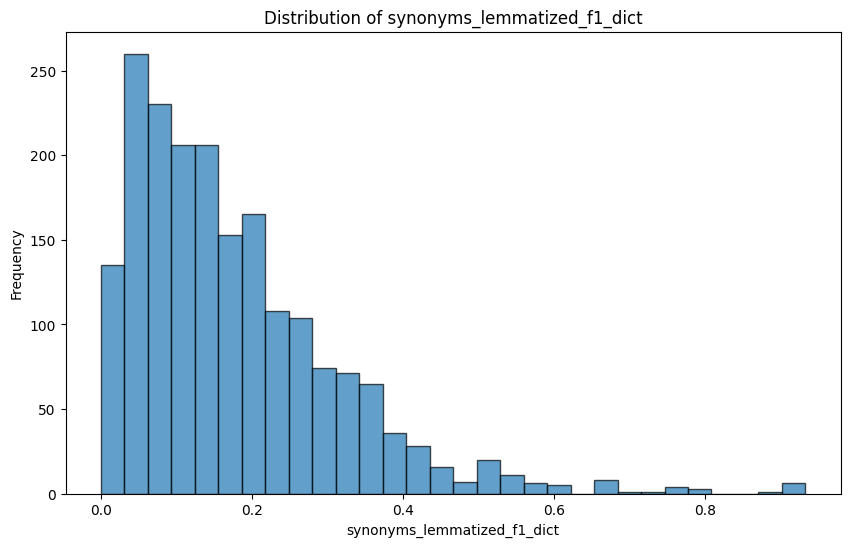

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_merged['synonyms_lemmatized_f1_dict'].dropna(), bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('synonyms_lemmatized_f1_dict')
plt.ylabel('Frequency')
plt.title('Distribution of synonyms_lemmatized_f1_dict')


In [112]:
df_filtered = df_merged[df_merged['MedGPT4'] < 0.6]
df_filtered['MedGPT4'].mean()

3.5433255269320845

In [84]:
df_filtered.columns

Index(['model', 'category_id', 'iteration_number', 'question_index',
       'question', 'model_answer', 'gold_answer', 'MedGPT1', 'MedGPT2',
       'MedGPT3', 'MedGPT4', 'MedGPT5', 'MedGPT_overall_score', 'precision',
       'recall', 'f1_score', 'synonyms_precision_dict', 'synonyms_recall_dict',
       'synonyms_f1_dict', 'synonyms_precision_snomed',
       'synonyms_recall_snomed', 'synonyms_f1_snomed', 'synonyms_precision_wn',
       'synonyms_recall_wn', 'synonyms_f1_wn',
       'synonyms_lemmatized_precision_dict', 'synonyms_lemmatized_recall_dict',
       'synonyms_lemmatized_f1_dict', 'synonyms_lemmatized_precision_snomed',
       'synonyms_lemmatized_recall_snomed', 'synonyms_lemmatized_f1_snomed',
       'synonyms_lemmatized_precision_wn', 'synonyms_lemmatized_recall_wn',
       'synonyms_lemmatized_f1_wn'],
      dtype='object')

In [100]:
import pandas as pd
import json

# File paths
f1_json_path = '/cluster/home/gcardenal/HIV/deploy_medical_LLM_evaluation/deploy_medical_llm_evaluation/gold_standard_rephrasing/rephrased-f1_results.json'
csv_path = '/cluster/home/gcardenal/HIV/deploy_medical_LLM_evaluation/deploy_medical_llm_evaluation/gold_standard_rephrasing/rephrased_raw_GPT4-score.csv'

# Load JSON data
with open(f1_json_path, 'r') as f:
    data_records = json.load(f)

df_f1 = pd.DataFrame(data_records)

# Load CSV data
df = pd.read_csv(csv_path)

# Rename columns for consistency
df_f1.rename(columns={'model_subfolder': 'subfolder'}, inplace=True)

# Ensure consistent dtypes for merging
df['model'] = df['model'].astype(str)
df_f1['model'] = df_f1['model'].astype(str)

df['category_id'] = df['category_id'].astype(str)
df_f1['category_id'] = df_f1['category_id'].astype(str)

df['question_index'] = df['question_index'].astype(str)
df_f1['question_index'] = df_f1['question_index'].astype(str)

# Merge
merged_df = pd.merge(
    df, df_f1,
    on=['model', 'category_id', 'question_index', 'iteration_number'],
    how='left'
)

# Rename models
rename_dict = {
    'Llama': 'Llama 3.3-70B-Instruct',
    'Meditron': 'Meditron 3-70B',
    'Llama-8B': 'Llama 3.1-8B-Instruct',
    'Claude': 'Claude 3.5 Sonnet',
    'Med42': 'Med42-70B',
    'NVLM': 'NVLM-70B', 
    'Llama-1B': 'Llama 3.2-1B-Instruct',
    'rephrased_true_answers': 'Rephrased Gold Answers'
}

merged_df['model'] = merged_df['model'].replace(rename_dict)

# Drop unnecessary columns
merged_df = merged_df.drop(columns=['file_name', 'nlp_model', 'GPT_overall_score_wo_Q4&5'])

# Rename GPT columns
merged_df = merged_df.rename(columns={
    'GPT1': 'MedGPT1',
    'GPT2': 'MedGPT2',
    'GPT3': 'MedGPT3',
    'GPT4': 'MedGPT4',
    'GPT5': 'MedGPT5',
    'GPT_overall_score': 'MedGPT_overall_score'
})

# Save results
merged_df.to_csv('./gold_standard_rephrasing/rephrased_all_questions_answers_scores.csv', index=False)
merged_df = merged_df[merged_df['category_id'] != '6']
df_f1.to_csv('rephrased_f1_raw.csv', index=False)

In [14]:
df_grouped = df_cat4.groupby(['question_index']).agg(
    MedGPT_overall_mean=('MedGPT_overall_score', 'mean'),
).reset_index()
df_grouped = df_grouped.sort_values(by='MedGPT_overall_mean').reset_index(drop=True)
df_grouped
#Question 6,10, 9, 7 potential questions to show

,question_index,MedGPT_overall_mean
0,6,3.304762
1,1,3.457143
2,10,3.495238
3,9,3.609524
4,2,3.685714
5,0,3.828571
6,7,3.866667
7,5,3.904762
8,8,3.923810
9,4,4.276190
